**Exemplo do algoritmo Supervisionado  - KNN**

In [50]:
#importando as bibliotecas 
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [51]:
#cria a rotina para utilizar o dataset Iris
iris = datasets.load_iris()


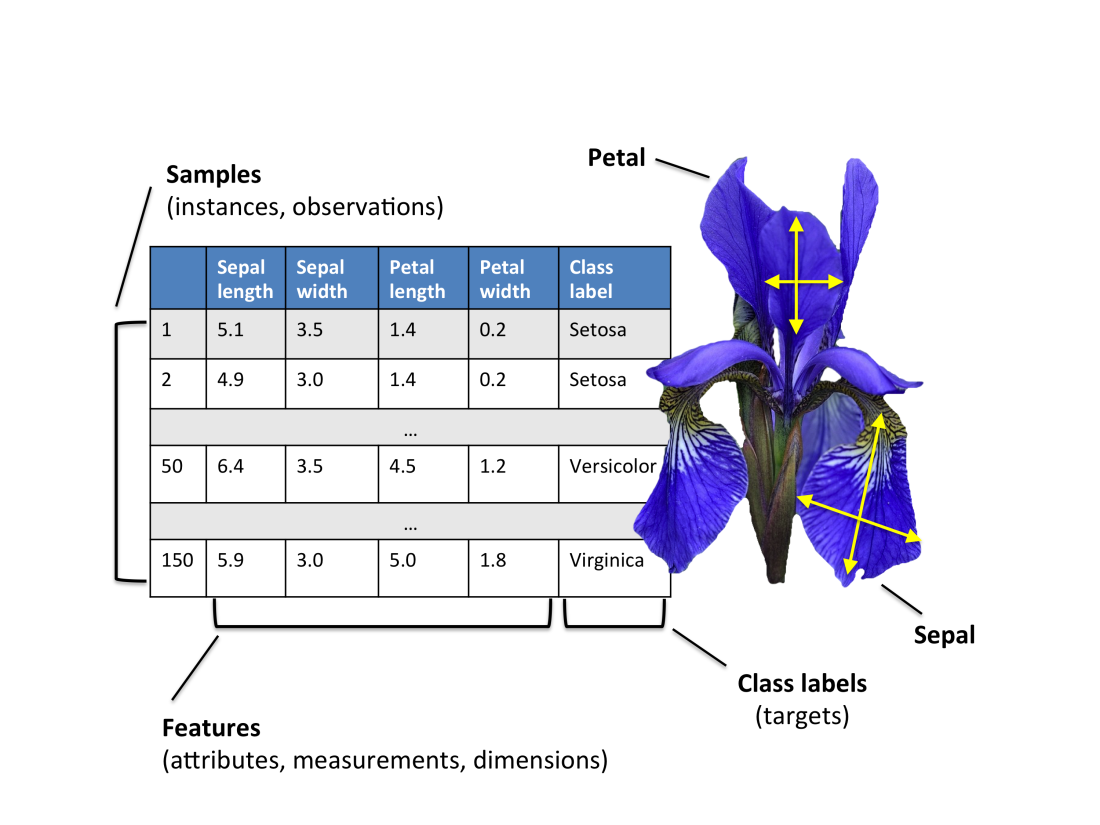

In [52]:
#Converte o banco de dados iris para o dataframe
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [53]:
df_iris.head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2     0.0
1                4.9               3.0  ...               0.2     0.0
2                4.7               3.2  ...               0.2     0.0
3                4.6               3.1  ...               0.2     0.0
4                5.0               3.6  ...               0.2     0.0

[5 rows x 5 columns]

In [54]:
#transforma os dados em array
X = df_iris.iloc[:, :-1].values  #dados de entrada
y = df_iris.iloc[:, 4].values  # saídas ou target

In [55]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)# divide 20% para teste

In [56]:
# realiza o processo de normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  #objeto que normaliza os dados
scaler.fit(X_train)  #realiza a normalização dos dados

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
#treina o modelo 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
#realiza a previsão
y_pred = classifier.predict(X_test)

In [59]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 6  0  0]
 [ 0 11  1]
 [ 0  1 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.92      0.92      0.92        12
         2.0       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [60]:
#salvando o modelo 
import joblib


In [61]:
#salvando o modelo em disco
nome_arquivo = 'modelo_knn.joblib'
joblib.dump(classifier, nome_arquivo)

['modelo_knn.joblib']

In [62]:
scaler.mean_

array([5.8025    , 3.07916667, 3.63083333, 1.1475    ])

In [63]:
scaler.var_

array([0.72024375, 0.20248264, 3.17696597, 0.59332708])

In [64]:
import math

[math.sqrt(valores) for valores in scaler.var_]

[0.8486717563345677,
 0.44998070946307134,
 1.7824045478572539,
 0.7702772769161335]

In [66]:
!pip list -v | grep scikit-learn

scikit-learn                  0.22.2.post1   /usr/local/lib/python3.7/dist-packages pip      


In [ ]:
pip3.8 install --user scikit_learn==0.22.2.post1